In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tqdm

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import warnings

# Suppress runtime warnings
warnings.filterwarnings("ignore")

(4000, 1)
(3600, 2) (400, 2) (3600, 1) (400, 1)
dimensions= 2


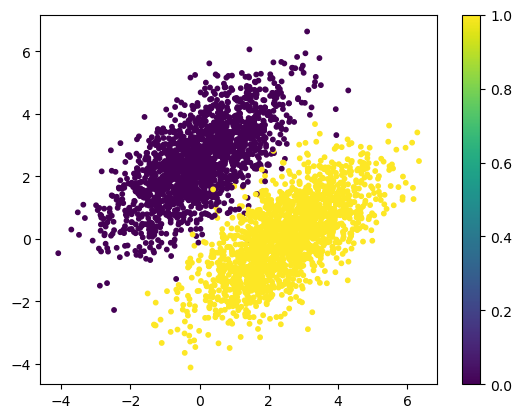

In [2]:
np.random.seed(42)

n_samples_per_class = 2000

neg_samples = np.random.multivariate_normal(mean=[0, 2.5],cov = [[1, 1.5], [1.5, 1]], size=n_samples_per_class).astype(np.float32)
pos_samples = np.random.multivariate_normal(mean=[2.5, 0],cov = [[1, 1.5], [1.5, 1]], size=n_samples_per_class).astype(np.float32)


input = np.vstack((neg_samples, pos_samples))

target = np.vstack((np.zeros((n_samples_per_class,1)), np.ones((n_samples_per_class,1)))).astype(np.float32)
print(target.shape)


X_train, X_test, y_train, y_test = train_test_split(input, target , 
                                                    random_state=42,  
                                                    test_size=0.1,  
                                                    shuffle=True) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print("dimensions=", X_train.ndim)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', s=10)
plt.colorbar()
plt.show()

In [3]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=1, input_shape=(2,))
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)),
    # tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))
])

model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01),
              loss='mean_squared_error')

In [4]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
29/29 [==============================] - 0s 375us/step - loss: 0.2019
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0599
Epoch 3/100
29/29 [==============================] - 0s 340us/step - loss: 0.0467
Epoch 4/100
29/29 [==============================] - 0s 257us/step - loss: 0.0421
Epoch 5/100
29/29 [==============================] - 0s 245us/step - loss: 0.0396
Epoch 6/100
29/29 [==============================] - 0s 248us/step - loss: 0.0377
Epoch 7/100
29/29 [==============================] - 0s 262us/step - loss: 0.0363
Epoch 8/100
29/29 [==============================] - 0s 267us/step - loss: 0.0350
Epoch 9/100
29/29 [==============================] - 0s 251us/step - loss: 0.0340
Epoch 10/100
29/29 [==============================] - 0s 244us/step - loss: 0.0330
Epoch 11/100
29/29 [==============================] - 0s 254us/step - loss: 0.0323
Epoch 12/100
29/29 [==============================] - 0s 278us/step - loss: 0.0316
Epoch 13/100
29

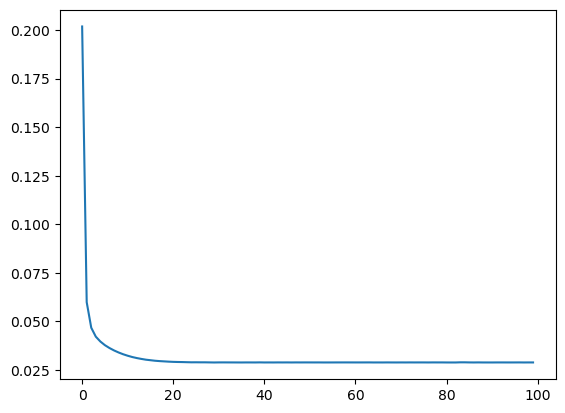

In [5]:
# history.history['loss']

plt.plot(history.history['loss'])

13/13 [==============================] - 0s 311us/step


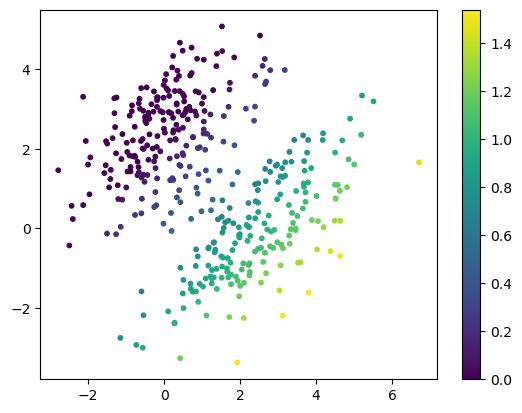

In [6]:
predictions = model.predict(X_test)


plt.scatter(X_test[:,0], X_test[:,1], c=predictions, cmap='viridis', s=10)
plt.colorbar()
plt.show()

Weights (W):
[[ 0.20135792]
 [-0.20084713]]

Biases (b):
[0.4499218]


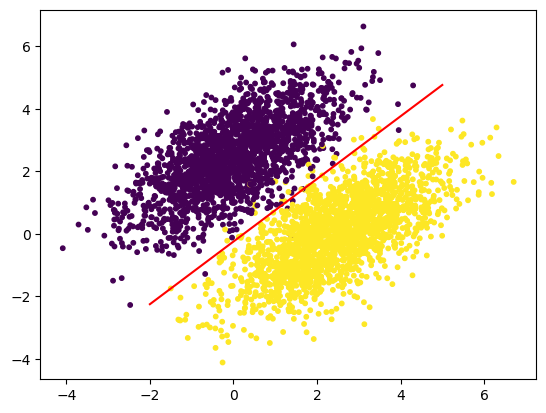

In [12]:
weights, biases = model.layers[-1].get_weights()

print("Weights (W):")
print(weights)
print("\nBiases (b):")
print(biases)

x = np.linspace(-2,5,100)
# y = np.linspace(-2,5,100)

y = (weights[0]*x+biases-0.5)/(-weights[1])

plt.plot(x,y, color='red')


# predictions = model(input)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', s=10)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions>0.5, cmap='viridis', s=10)

plt.show()
